<a href="https://colab.research.google.com/github/SheriffDeen002/Master-Sheriff/blob/master/Convolution%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

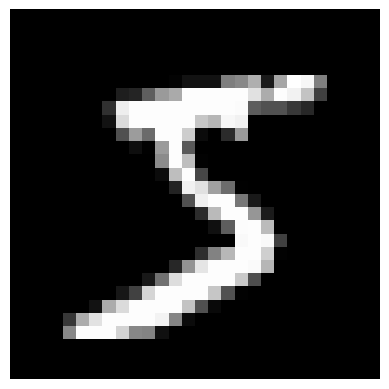

In [4]:
plt.imshow(x_train[0], cmap = "gray")
plt.gca().axis("off")

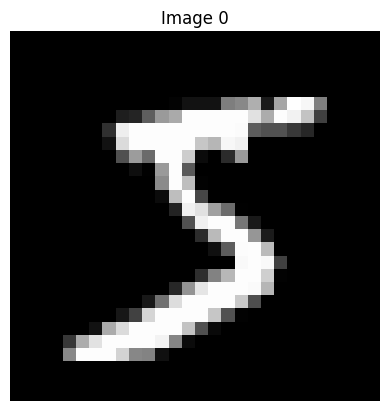

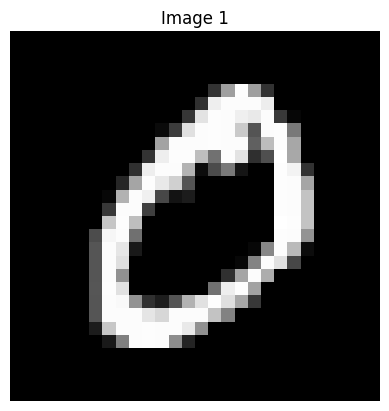

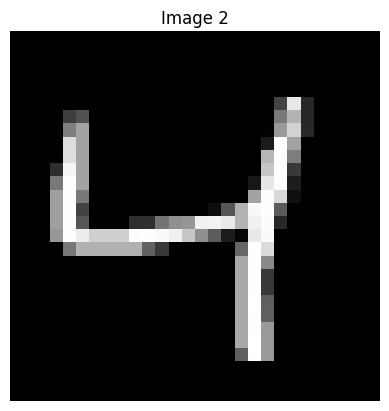

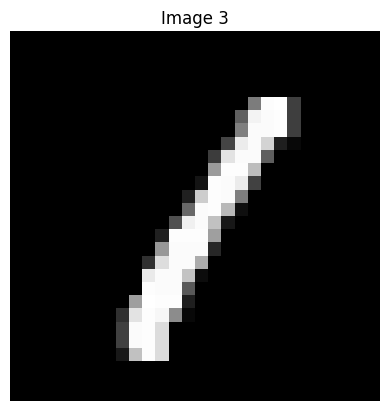

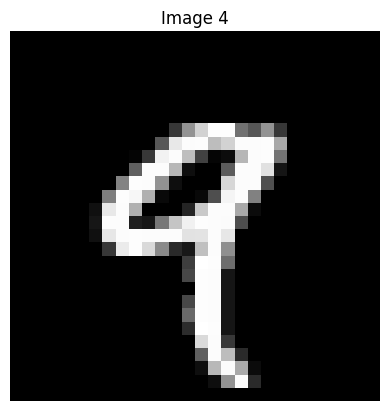

In [5]:
import matplotlib.pyplot as plt

# Loop through the first five images in the training set
for i in range(5):
    plt.figure()
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Image {i}")
    plt.axis("off")
    plt.show()


In [7]:
import keras
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [9]:
width_npix = 28
height_npix = 28
x_train = x_train.reshape(-1, width_npix, height_npix, 1)
x_test = x_test.reshape(-1, width_npix, height_npix, 1)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=20,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False,
shear_range=0.10,
zoom_range=0.10,
validation_split=0.2)

In [14]:
train_datagen.fit(x_train)

In [22]:
x_train_norm = x_train.astype('float32') / 255.0
new_image = train_datagen.random_transform(x_train_norm[0])

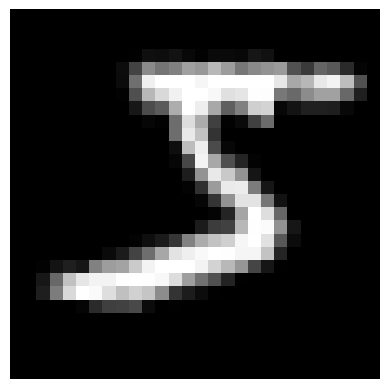

In [16]:
x_train_norm = x_train.astype('float32') / 255.0
new_image = train_datagen.random_transform(x_train_norm[0])
plt.imshow(new_image.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

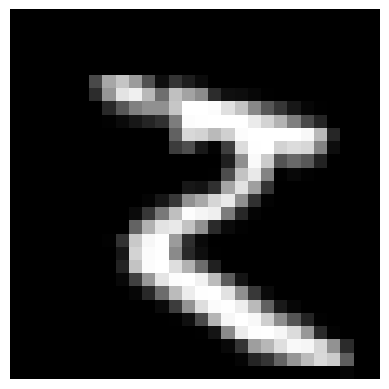

In [18]:
plt.imshow(new_image.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 input_shape = (width_npix, height_npix, 1),
                 activation = 'relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(10, activation = 'softmax'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

In [48]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential
# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix, height_npix, 1), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(10, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Since we want to specify the learning rate
# ourselves, we need to import the Adam
# class from the Keras library.
from keras.optimizers import Adam
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.01)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Specify the batch size to use when
# training the model.
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size = batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,
y_train_cat, batch_size = batch_size, subset = "validation"))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.4608 - loss: 1.5070 - val_accuracy: 0.7505 - val_loss: 0.7416
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.6985 - loss: 0.9211 - val_accuracy: 0.7728 - val_loss: 0.7187
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7381 - loss: 0.8332 - val_accuracy: 0.8123 - val_loss: 0.5998
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.7630 - loss: 0.7796 - val_accuracy: 0.8153 - val_loss: 0.5972
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.7748 - loss: 0.7448 - val_accuracy: 0.8301 - val_loss: 0.5728
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.7811 - loss: 0.7386 - val_accuracy: 0.8336 - val_loss: 0.5573
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.7952 - loss: 0.7070 - val_accuracy: 0.8177 - val_loss: 0.5984
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.7926 -

In [39]:
history_df = pd.DataFrame(history.history)

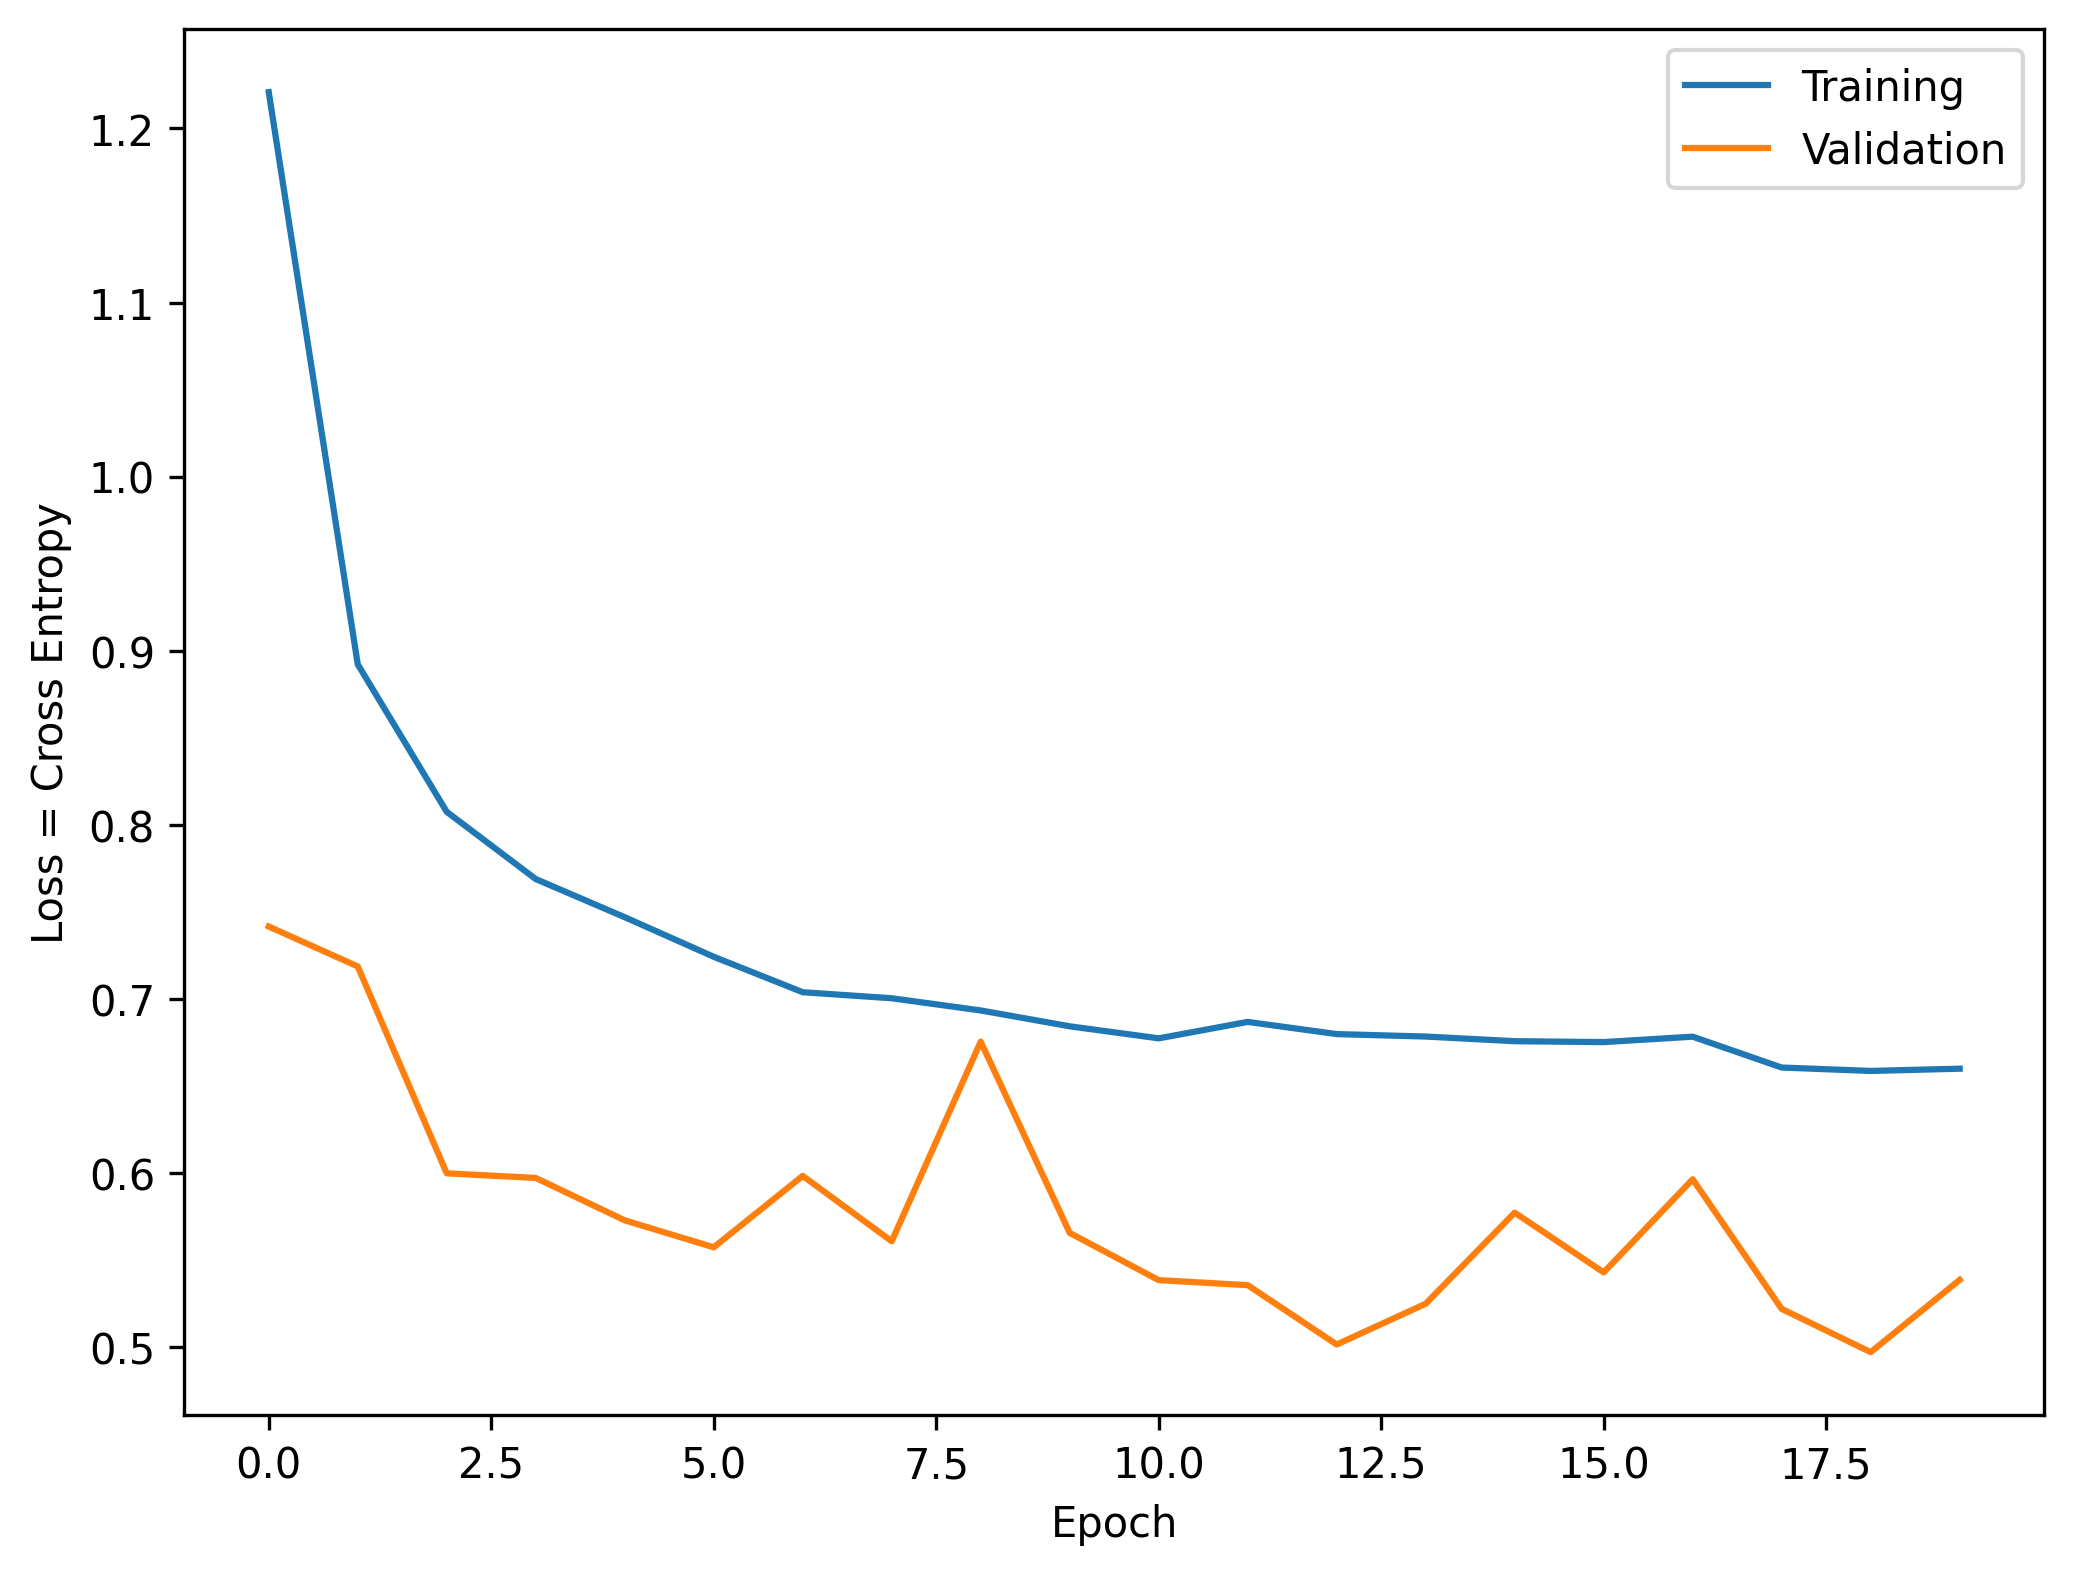

In [50]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()



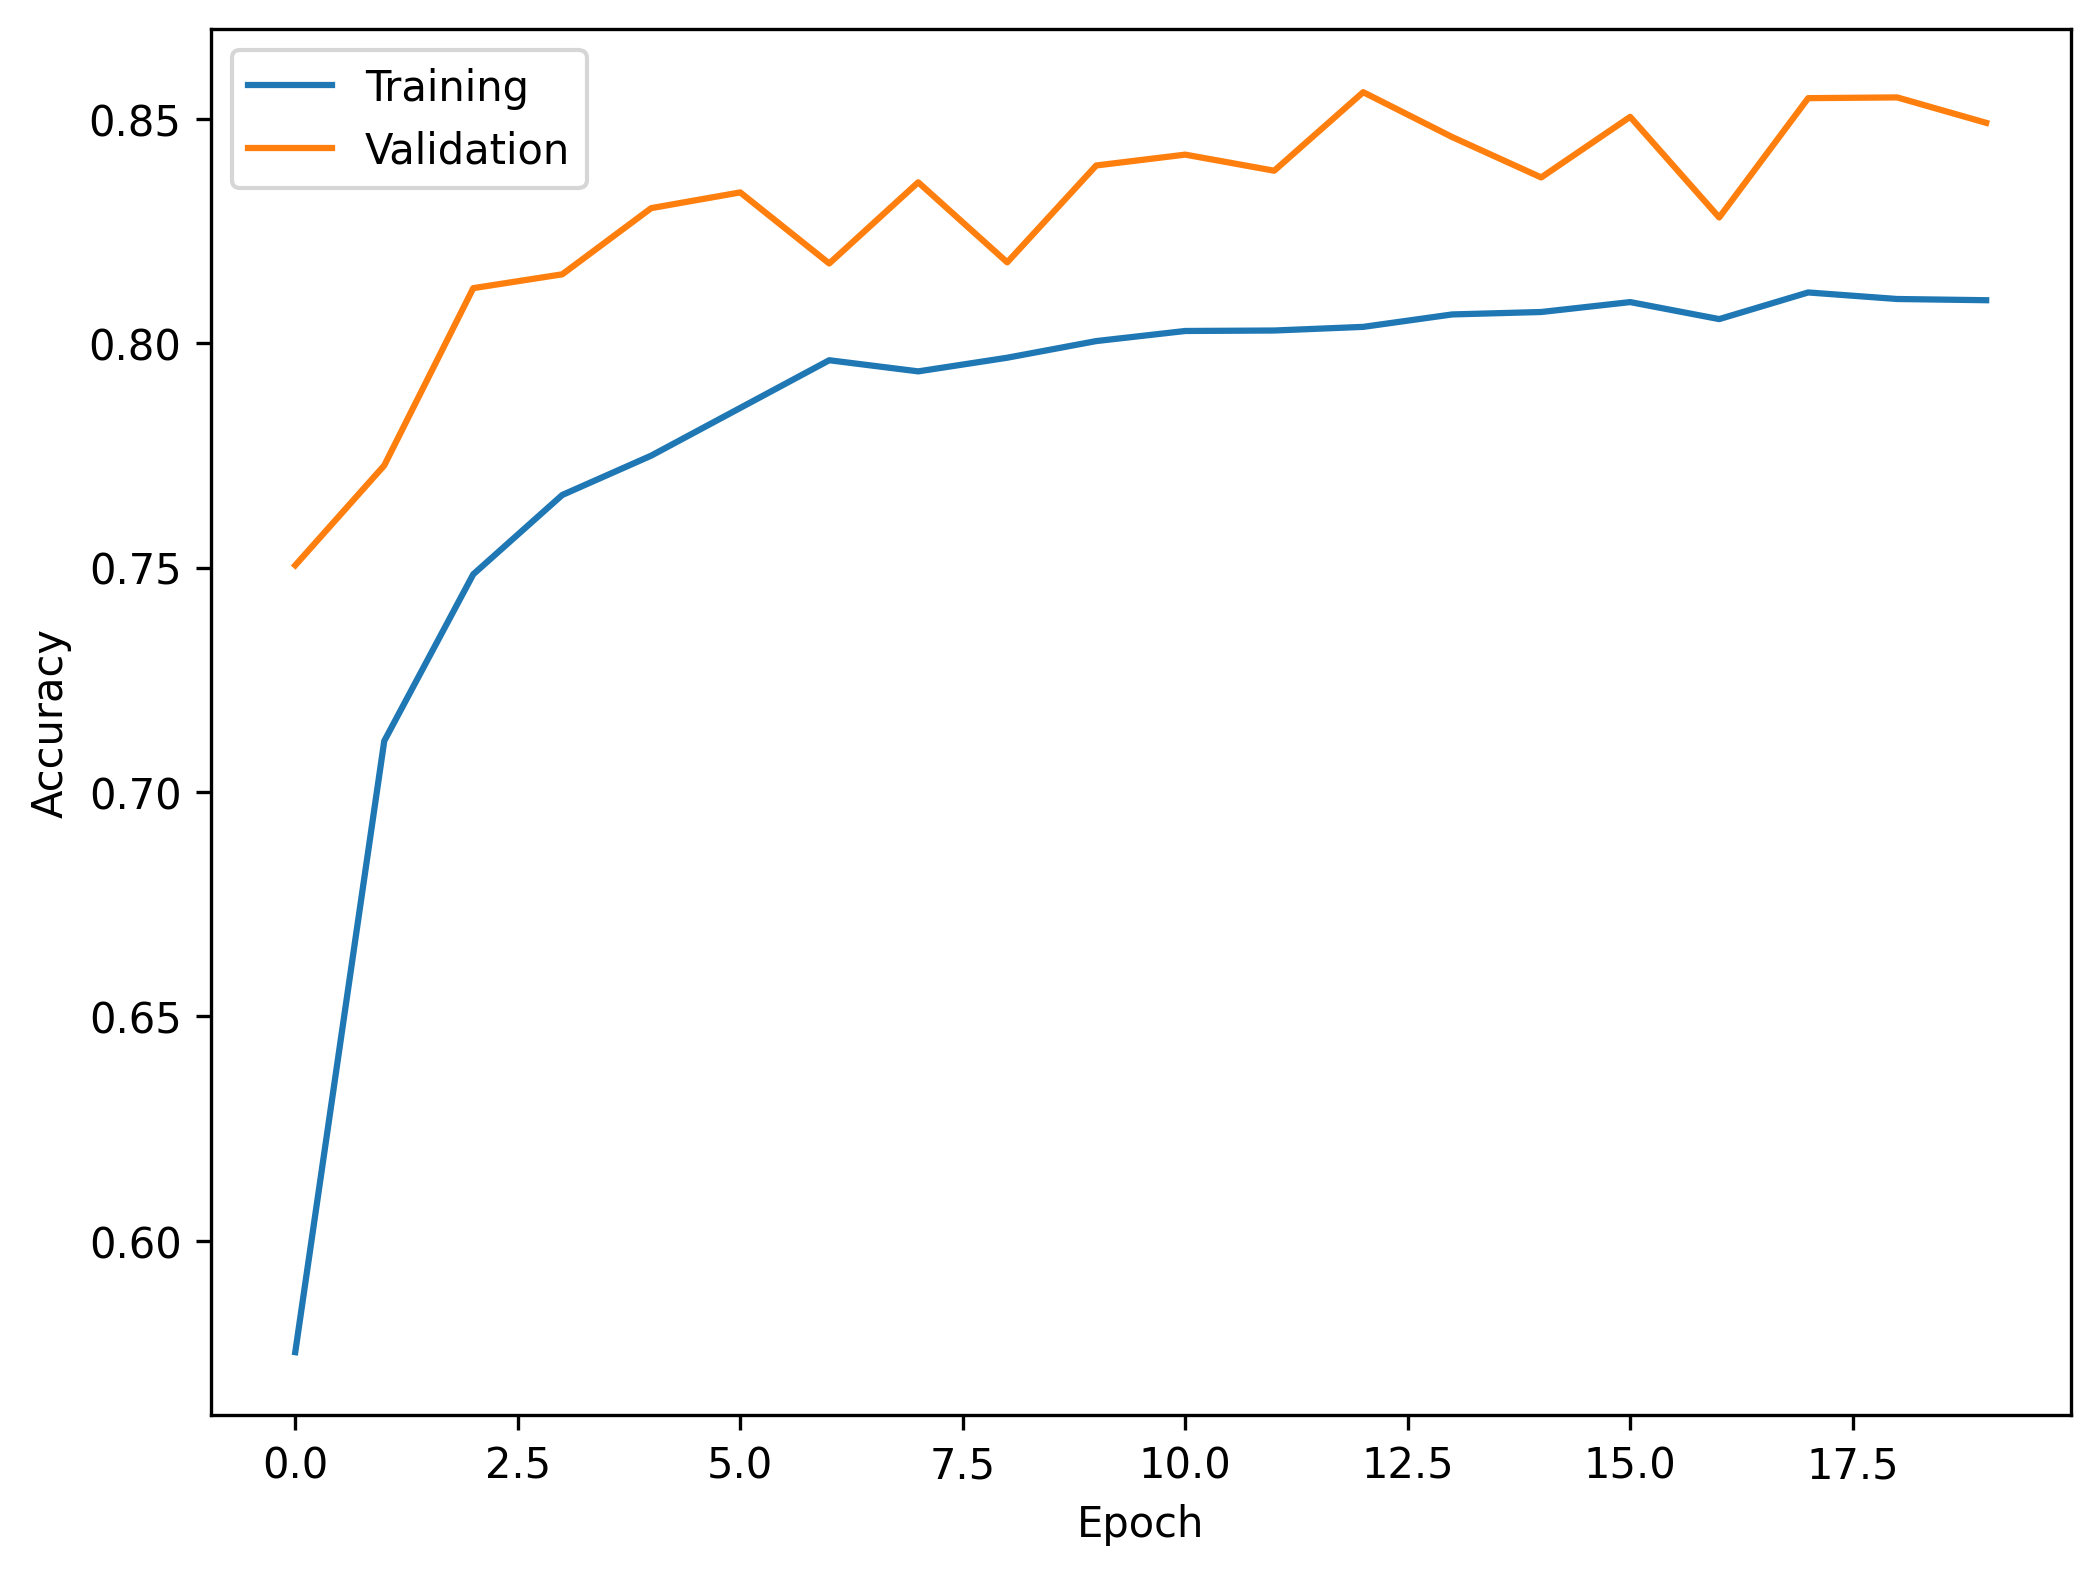

In [51]:
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()



In [52]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(10)]
# Numerical index of each label
numerical_labels = [i for i in range(10)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [54]:
# Normalize the test data
x_test_norm = x_test.astype('float32') / 255.0
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


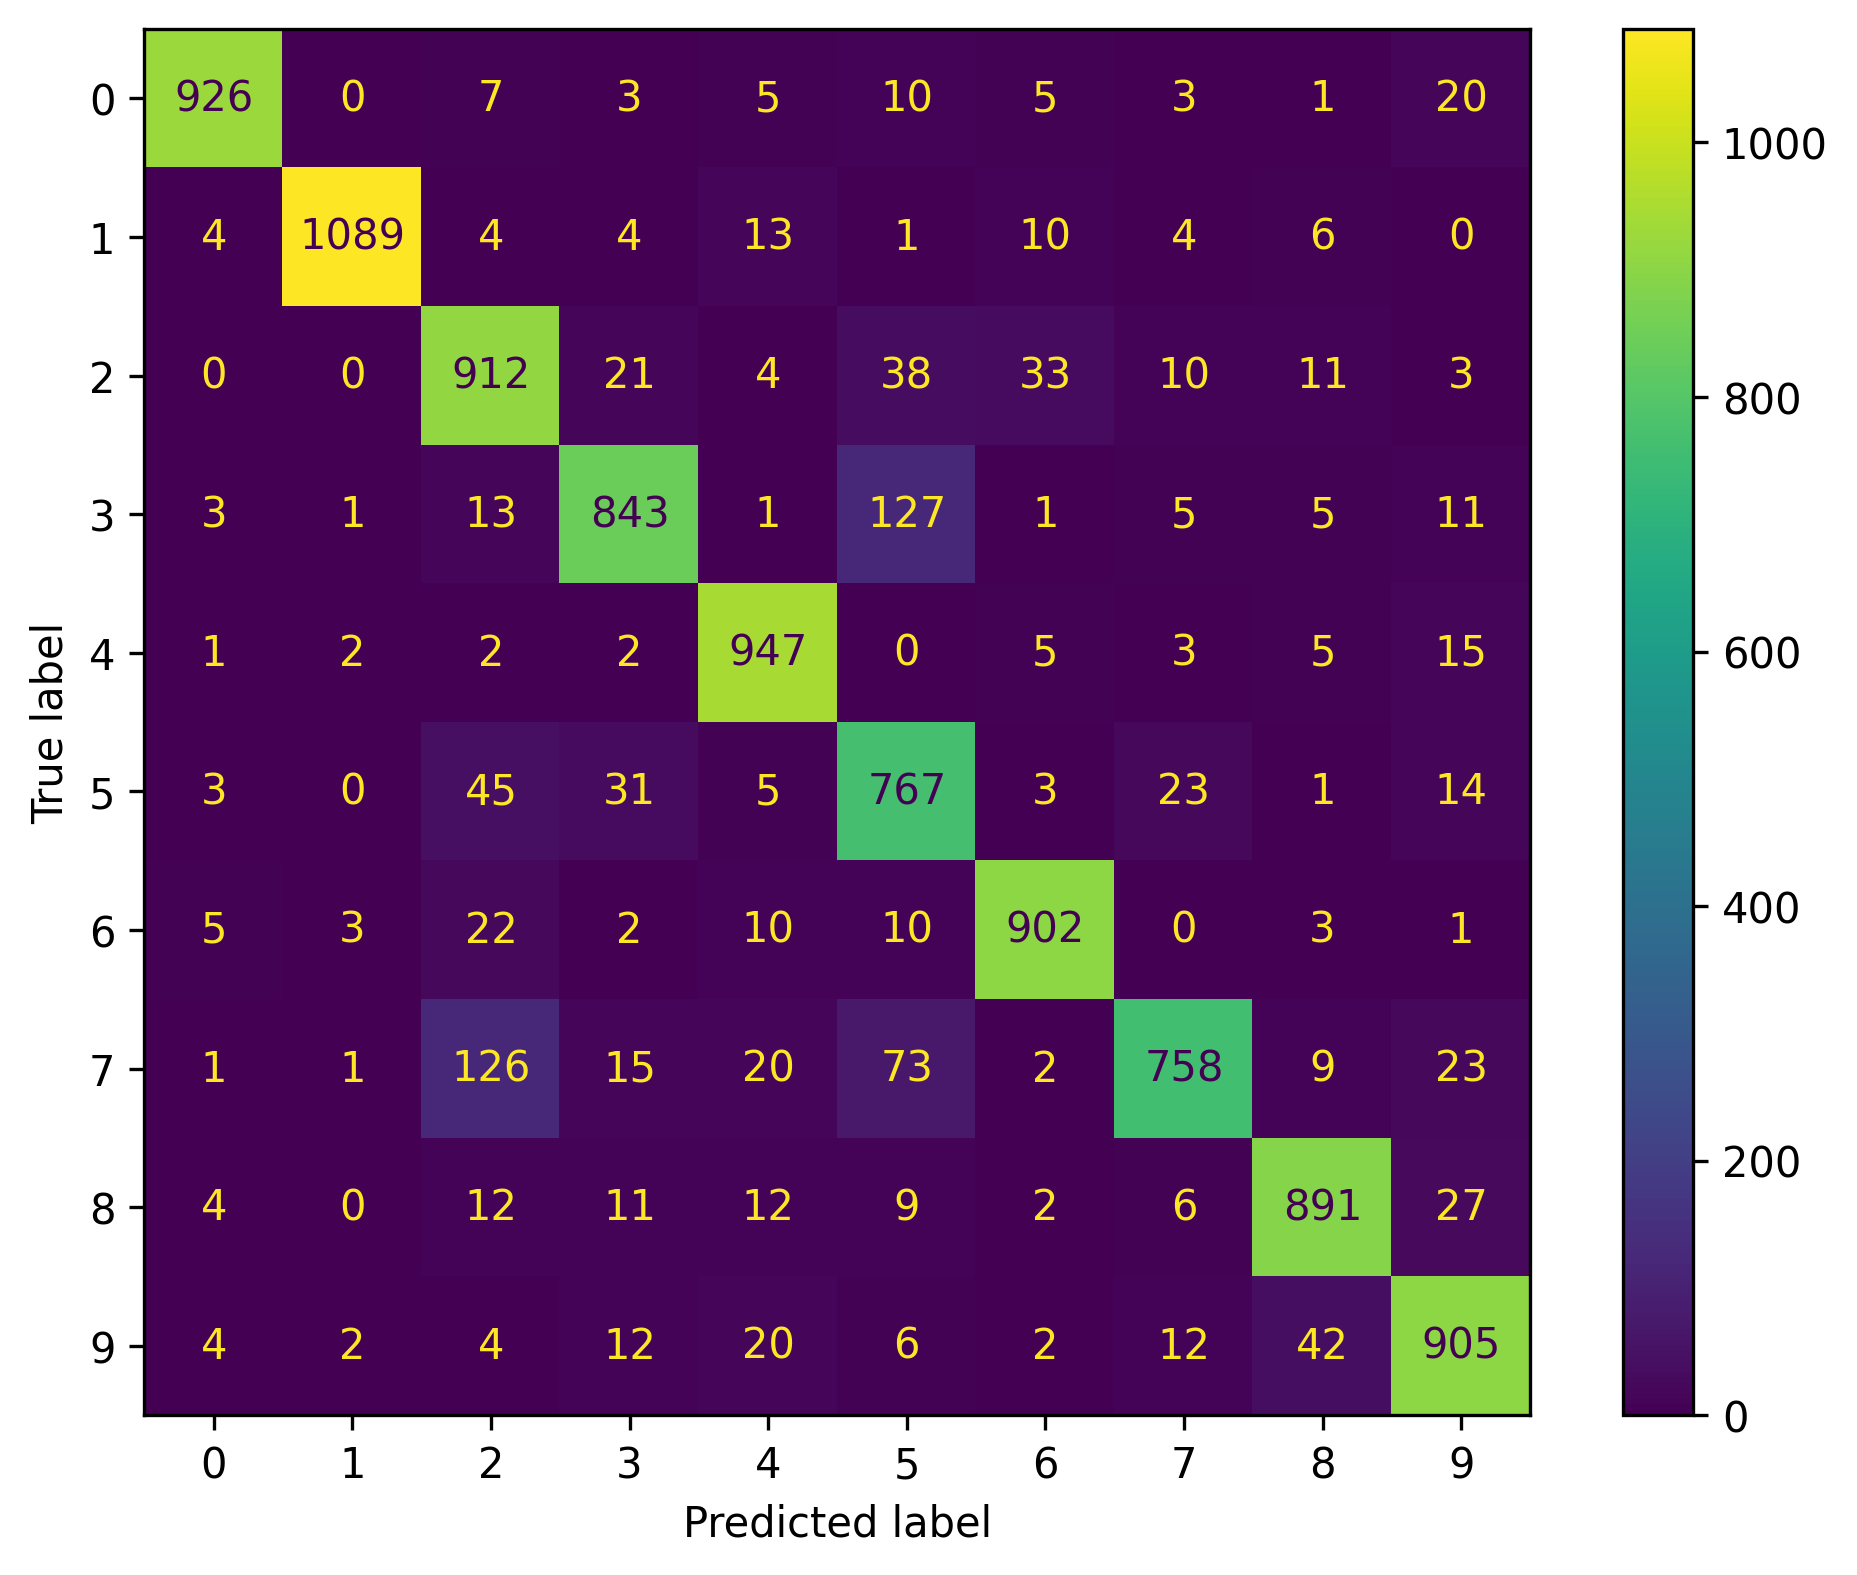

In [56]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [ ]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix, height_npix, 1), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(10, activation = 'softmax'))
# Print a summary of the model.
model.summary()
# Create an instance of the Adam class,
# and set the learning rate.
from keras.optimizers import Adam
adam_optimizer = Adam(learning_rate = 0.01)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Define the batch size
batch_size = 128
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size = batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,
y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()
# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 163ms/step - accuracy: 0.4690 - loss: 1.4703 - val_accuracy: 0.8332 - val_loss: 0.5413
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.8185 - loss: 0.6019 - val_accuracy: 0.8779 - val_loss: 0.3868
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.8547 - loss: 0.4912 - val_accuracy: 0.8921 - val_loss: 0.3535
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.8765 - loss: 0.4194 - val_accuracy: 0.8834 - val_loss: 0.3961
Epoch 5/20
199/375 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - accuracy: 0.8706 - loss: 0.4435